In [1]:

!pip install gymnasium pygame --quiet

In [2]:

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


In [3]:

env_names = ["MountainCar-v0", "Pendulum-v1"]

In [5]:

def analyze_env(env_name, steps=300):
    env = gym.make(env_name, render_mode="rgb_array")
    obs, info = env.reset()

    print(f"\n📦 Environment: {env_name}")
    print("-" * 40)
    print(f"Observation space: {env.observation_space}")
    print(f"Action space: {env.action_space}")

    if hasattr(env.action_space, 'n'):
        action_type = "Discrete"
    else:
        action_type = "Continuous"

    print(f"Action type: {action_type}")

    done = False
    episode_reward = 0
    episode_length = 0

    for _ in range(steps):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        episode_length += 1
        done = terminated or truncated

        if episode_length % 5 == 0:
            clear_output(wait=True)
            plt.imshow(env.render())
            plt.axis("off")
            plt.title(f"{env_name} | Step {episode_length}")
            plt.show()
            time.sleep(0.01)

        if done:
            break

    env.close()

    print(f"🎯 Episode reward: {episode_reward:.2f}")
    print(f"🕒 Episode length: {episode_length} steps")

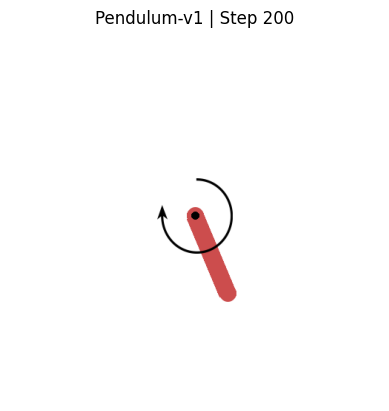

🎯 Episode reward: -771.25
🕒 Episode length: 200 steps


In [6]:

for env in env_names:
    analyze_env(env)

In [7]:
env = gym.make(env_names[0])
obs, info = env.reset()

print(f"🔎 Sample observations and actions from {env_names[0]}:\n")

for i in range(10):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    print(f"Step {i+1}:")
    print(f"  Observation: {obs}")
    print(f"  Action taken: {action}")
    print(f"  Reward: {reward}")
    print(f"  Terminated: {terminated}, Truncated: {truncated}\n")
    if terminated or truncated:
        break
env.close()

🔎 Sample observations and actions from MountainCar-v0:

Step 1:
  Observation: [-5.806163e-01 -5.787285e-04]
  Action taken: 0
  Reward: -1.0
  Terminated: False, Truncated: False

Step 2:
  Observation: [-0.58176947 -0.00115318]
  Action taken: 0
  Reward: -1.0
  Terminated: False, Truncated: False

Step 3:
  Observation: [-0.5834886  -0.00171911]
  Action taken: 0
  Reward: -1.0
  Terminated: False, Truncated: False

Step 4:
  Observation: [-0.58476096 -0.00127235]
  Action taken: 1
  Reward: -1.0
  Terminated: False, Truncated: False

Step 5:
  Observation: [-5.8457714e-01  1.8379773e-04]
  Action taken: 2
  Reward: -1.0
  Terminated: False, Truncated: False

Step 6:
  Observation: [-0.58293855  0.00163859]
  Action taken: 2
  Reward: -1.0
  Terminated: False, Truncated: False

Step 7:
  Observation: [-0.5798573   0.00308129]
  Action taken: 2
  Reward: -1.0
  Terminated: False, Truncated: False

Step 8:
  Observation: [-0.57635605  0.00350123]
  Action taken: 1
  Reward: -1.0
  Ter

In [8]:

env = gym.make(env_names[0], render_mode="rgb_array")
obs, info = env.reset()
frame = env.render()
plt.imsave("sample_frame.png", frame)
env.close()

print("🖼️ Frame saved as sample_frame.png. You can download it via the left Files tab.")

🖼️ Frame saved as sample_frame.png. You can download it via the left Files tab.


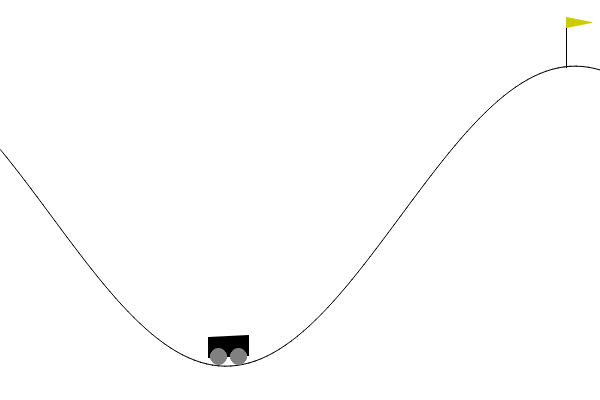

In [9]:
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage, display

def display_env_gif(env_name, steps=100):
    env = gym.make(env_name, render_mode="rgb_array")
    obs, info = env.reset()
    frames = []

    for _ in range(steps):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        frame = env.render()
        frames.append(Image.fromarray(frame))
        if terminated or truncated:
            break
    env.close()

    gif_buffer = BytesIO()
    frames[0].save(gif_buffer, format="GIF", save_all=True,
                   append_images=frames[1:], duration=50, loop=0)
    gif_buffer.seek(0)

    display(IPImage(data=gif_buffer.getvalue()))

display_env_gif(env_names[0])

In [11]:
import gymnasium as gym
import numpy as np
import seaborn as sns
import pandas as pd
import time
from collections import defaultdict, deque
from typing import Dict, List, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("All libraries imported successfully.")
print("Plotting configuration set.")
print("Ready to explore RL environments.")

All libraries imported successfully.
Plotting configuration set.
Ready to explore RL environments.


In [12]:
class EnvironmentAnalyzer:
    """Advanced class for analyzing RL environments"""
    def __init__(self, env_name: str):
        self.env_name = env_name
        self.env = None
        self.metrics = defaultdict(list)
        self.episode_data = []

    def create_environment(self, render_mode: Optional[str] = None):
        self.env = gym.make(self.env_name, render_mode=render_mode)
        return self.env

    def get_environment_info(self) -> Dict:
        if self.env is None:
            self.create_environment()
        info = {
            'name': self.env_name,
            'observation_space': self.env.observation_space,
            'action_space': self.env.action_space,
            'obs_shape': self.env.observation_space.shape,
            'action_shape': getattr(self.env.action_space, 'shape', 'N/A'),
            'obs_type': type(self.env.observation_space).__name__,
            'action_type': type(self.env.action_space).__name__
        }
        if hasattr(self.env.observation_space, 'low'):
            info['obs_low'] = self.env.observation_space.low
            info['obs_high'] = self.env.observation_space.high
        if hasattr(self.env.action_space, 'low'):
            info['action_low'] = self.env.action_space.low
            info['action_high'] = self.env.action_space.high
        elif hasattr(self.env.action_space, 'n'):
            info['action_count'] = self.env.action_space.n
        return info

    def run_episodes(self, num_episodes: int = 10, max_steps: int = 500,
                    collect_data: bool = True, render: bool = False) -> Dict:
        if self.env is None:
            self.create_environment("human" if render else None)
        episode_rewards = []
        episode_lengths = []
        success_count = 0
        for episode in range(num_episodes):
            obs, info = self.env.reset()
            episode_reward = 0
            episode_length = 0
            for step in range(max_steps):
                action = self.env.action_space.sample()
                obs, reward, terminated, truncated, info = self.env.step(action)
                episode_reward += reward
                episode_length += 1
                if terminated or truncated:
                    if episode_reward > 0:
                        success_count += 1
                    break
            episode_rewards.append(episode_reward)
            episode_lengths.append(episode_length)
            if collect_data:
                self.episode_data.append({
                    'episode': episode + 1,
                    'reward': episode_reward,
                    'length': episode_length,
                    'success': episode_reward > 0
                })
        results = {
            'total_episodes': num_episodes,
            'avg_reward': np.mean(episode_rewards),
            'std_reward': np.std(episode_rewards),
            'max_reward': np.max(episode_rewards),
            'min_reward': np.min(episode_rewards),
            'avg_length': np.mean(episode_lengths),
            'std_length': np.std(episode_lengths),
            'success_rate': success_count / num_episodes,
            'rewards': episode_rewards,
            'lengths': episode_lengths
        }
        return results

    def visualize_performance(self, results: Dict):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Performance Analysis: {self.env_name}', fontsize=16, fontweight='bold')
        axes[0,0].hist(results['rewards'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(results['avg_reward'], color='red', linestyle='--',
                         label=f'Mean: {results["avg_reward"]:.2f}')
        axes[0,0].set_title('Reward Distribution')
        axes[0,0].set_xlabel('Episode Reward')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        axes[0,1].hist(results['lengths'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].axvline(results['avg_length'], color='red', linestyle='--',
                         label=f'Mean: {results["avg_length"]:.2f}')
        axes[0,1].set_title('Episode Length Distribution')
        axes[0,1].set_xlabel('Episode Length')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        axes[1,0].plot(range(1, len(results['rewards'])+1), results['rewards'],
                      marker='o', linewidth=2, markersize=4)
        axes[1,0].set_title('Reward Over Episodes')
        axes[1,0].set_xlabel('Episode')
        axes[1,0].set_ylabel('Reward')
        axes[1,0].grid(True, alpha=0.3)
        metrics_text = f"""
Performance Summary:

Average Reward: {results['avg_reward']:.2f} ± {results['std_reward']:.2f}
Average Length: {results['avg_length']:.2f} ± {results['std_length']:.2f}
Max Reward: {results['max_reward']:.2f}
Min Reward: {results['min_reward']:.2f}
Success Rate: {results['success_rate']:.1%}
"""
        axes[1,1].text(0.1, 0.5, metrics_text, fontsize=12,
                      verticalalignment='center', fontfamily='monospace',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
        axes[1,1].set_xlim(0, 1)
        axes[1,1].set_ylim(0, 1)
        axes[1,1].axis('off')
        plt.tight_layout()
        plt.show()

    def print_environment_summary(self):
        info = self.get_environment_info()
        print("=" * 80)
        print(f"ENVIRONMENT ANALYSIS: {info['name']}")
        print("=" * 80)
        print(f"Observation Space: {info['observation_space']}")
        print(f"Action Space: {info['action_space']}")
        print(f"Observation Shape: {info['obs_shape']}")
        print(f"Action Shape: {info['action_shape']}")
        print(f"Observation Type: {info['obs_type']}")
        print(f"Action Type: {info['action_type']}")
        if 'obs_low' in info:
            print(f"Observation Range: [{info['obs_low'][0]:.2f}, {info['obs_high'][0]:.2f}]")
        if 'action_low' in info:
            print(f"Action Range: [{info['action_low'][0]:.2f}, {info['action_high'][0]:.2f}]")
        elif 'action_count' in info:
            print(f"Number of Actions: {info['action_count']}")
        print("=" * 80)

    def cleanup(self):
        if self.env:
            self.env.close()
            print(f"Environment {self.env_name} cleaned up successfully.")

print("EnvironmentAnalyzer class created successfully.")
print("Ready to analyze RL environments with advanced features.")

EnvironmentAnalyzer class created successfully.
Ready to analyze RL environments with advanced features.


# Utility Classes and Functions
Defines the `EnvironmentAnalyzer` class for analyzing RL environments, running episodes, and visualizing results.

In [13]:
class EnvironmentAnalyzer:
    """Advanced class for analyzing RL environments"""
    def __init__(self, env_name: str):
        self.env_name = env_name
        self.env = None
        self.metrics = defaultdict(list)
        self.episode_data = []

    def create_environment(self, render_mode: Optional[str] = None):
        self.env = gym.make(self.env_name, render_mode=render_mode)
        return self.env

    def get_environment_info(self) -> Dict:
        if self.env is None:
            self.create_environment()
        info = {
            'name': self.env_name,
            'observation_space': self.env.observation_space,
            'action_space': self.env.action_space,
            'obs_shape': self.env.observation_space.shape,
            'action_shape': getattr(self.env.action_space, 'shape', 'N/A'),
            'obs_type': type(self.env.observation_space).__name__,
            'action_type': type(self.env.action_space).__name__
        }
        if hasattr(self.env.observation_space, 'low'):
            info['obs_low'] = self.env.observation_space.low
            info['obs_high'] = self.env.observation_space.high
        if hasattr(self.env.action_space, 'low'):
            info['action_low'] = self.env.action_space.low
            info['action_high'] = self.env.action_space.high
        elif hasattr(self.env.action_space, 'n'):
            info['action_count'] = self.env.action_space.n
        return info

    def run_episodes(self, num_episodes: int = 10, max_steps: int = 500,
                    collect_data: bool = True, render: bool = False) -> Dict:
        if self.env is None:
            self.create_environment("human" if render else None)
        episode_rewards = []
        episode_lengths = []
        success_count = 0
        for episode in range(num_episodes):
            obs, info = self.env.reset()
            episode_reward = 0
            episode_length = 0
            for step in range(max_steps):
                action = self.env.action_space.sample()
                obs, reward, terminated, truncated, info = self.env.step(action)
                episode_reward += reward
                episode_length += 1
                if terminated or truncated:
                    if episode_reward > 0:
                        success_count += 1
                    break
            episode_rewards.append(episode_reward)
            episode_lengths.append(episode_length)
            if collect_data:
                self.episode_data.append({
                    'episode': episode + 1,
                    'reward': episode_reward,
                    'length': episode_length,
                    'success': episode_reward > 0
                })
        results = {
            'total_episodes': num_episodes,
            'avg_reward': np.mean(episode_rewards),
            'std_reward': np.std(episode_rewards),
            'max_reward': np.max(episode_rewards),
            'min_reward': np.min(episode_rewards),
            'avg_length': np.mean(episode_lengths),
            'std_length': np.std(episode_lengths),
            'success_rate': success_count / num_episodes,
            'rewards': episode_rewards,
            'lengths': episode_lengths
        }
        return results

    def visualize_performance(self, results: Dict):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Performance Analysis: {self.env_name}', fontsize=16, fontweight='bold')
        axes[0,0].hist(results['rewards'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(results['avg_reward'], color='red', linestyle='--',
                         label=f'Mean: {results["avg_reward"]:.2f}')
        axes[0,0].set_title('Reward Distribution')
        axes[0,0].set_xlabel('Episode Reward')
        axes[0,0].set_ylabel('Frequency')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        axes[0,1].hist(results['lengths'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        axes[0,1].axvline(results['avg_length'], color='red', linestyle='--',
                         label=f'Mean: {results["avg_length"]:.2f}')
        axes[0,1].set_title('Episode Length Distribution')
        axes[0,1].set_xlabel('Episode Length')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        axes[1,0].plot(range(1, len(results['rewards'])+1), results['rewards'],
                      marker='o', linewidth=2, markersize=4)
        axes[1,0].set_title('Reward Over Episodes')
        axes[1,0].set_xlabel('Episode')
        axes[1,0].set_ylabel('Reward')
        axes[1,0].grid(True, alpha=0.3)
        metrics_text = f"""
Performance Summary:

Average Reward: {results['avg_reward']:.2f} ± {results['std_reward']:.2f}
Average Length: {results['avg_length']:.2f} ± {results['std_length']:.2f}
Max Reward: {results['max_reward']:.2f}
Min Reward: {results['min_reward']:.2f}
Success Rate: {results['success_rate']:.1%}
"""
        axes[1,1].text(0.1, 0.5, metrics_text, fontsize=12,
                      verticalalignment='center', fontfamily='monospace',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
        axes[1,1].set_xlim(0, 1)
        axes[1,1].set_ylim(0, 1)
        axes[1,1].axis('off')
        plt.tight_layout()
        plt.show()

    def print_environment_summary(self):
        info = self.get_environment_info()
        print("=" * 80)
        print(f"ENVIRONMENT ANALYSIS: {info['name']}")
        print("=" * 80)
        print(f"Observation Space: {info['observation_space']}")
        print(f"Action Space: {info['action_space']}")
        print(f"Observation Shape: {info['obs_shape']}")
        print(f"Action Shape: {info['action_shape']}")
        print(f"Observation Type: {info['obs_type']}")
        print(f"Action Type: {info['action_type']}")
        if 'obs_low' in info:
            print(f"Observation Range: [{info['obs_low'][0]:.2f}, {info['obs_high'][0]:.2f}]")
        if 'action_low' in info:
            print(f"Action Range: [{info['action_low'][0]:.2f}, {info['action_high'][0]:.2f}]")
        elif 'action_count' in info:
            print(f"Number of Actions: {info['action_count']}")
        print("=" * 80)

    def cleanup(self):
        if self.env:
            self.env.close()
            print(f"Environment {self.env_name} cleaned up successfully.")

print("EnvironmentAnalyzer class created successfully.")
print("Ready to analyze RL environments with advanced features.")

EnvironmentAnalyzer class created successfully.
Ready to analyze RL environments with advanced features.


## Environment 1: LunarLander-v3

Checking for LunarLander-v3 availability...
LunarLander-v3 is not available: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`
This is likely due to missing Box2D dependency.
Let's use CartPole-v1 as an alternative environment for demonstration...
ENVIRONMENT ANALYSIS: CartPole-v1
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action Space: Discrete(2)
Observation Shape: (4,)
Action Shape: ()
Observation Type: Box
Action Type: Discrete
Observation Range: [-4.80, 4.80]
Number of Actions: 2
Running performance analysis on CartPole-v1...
Analysis completed in 0.01 seconds


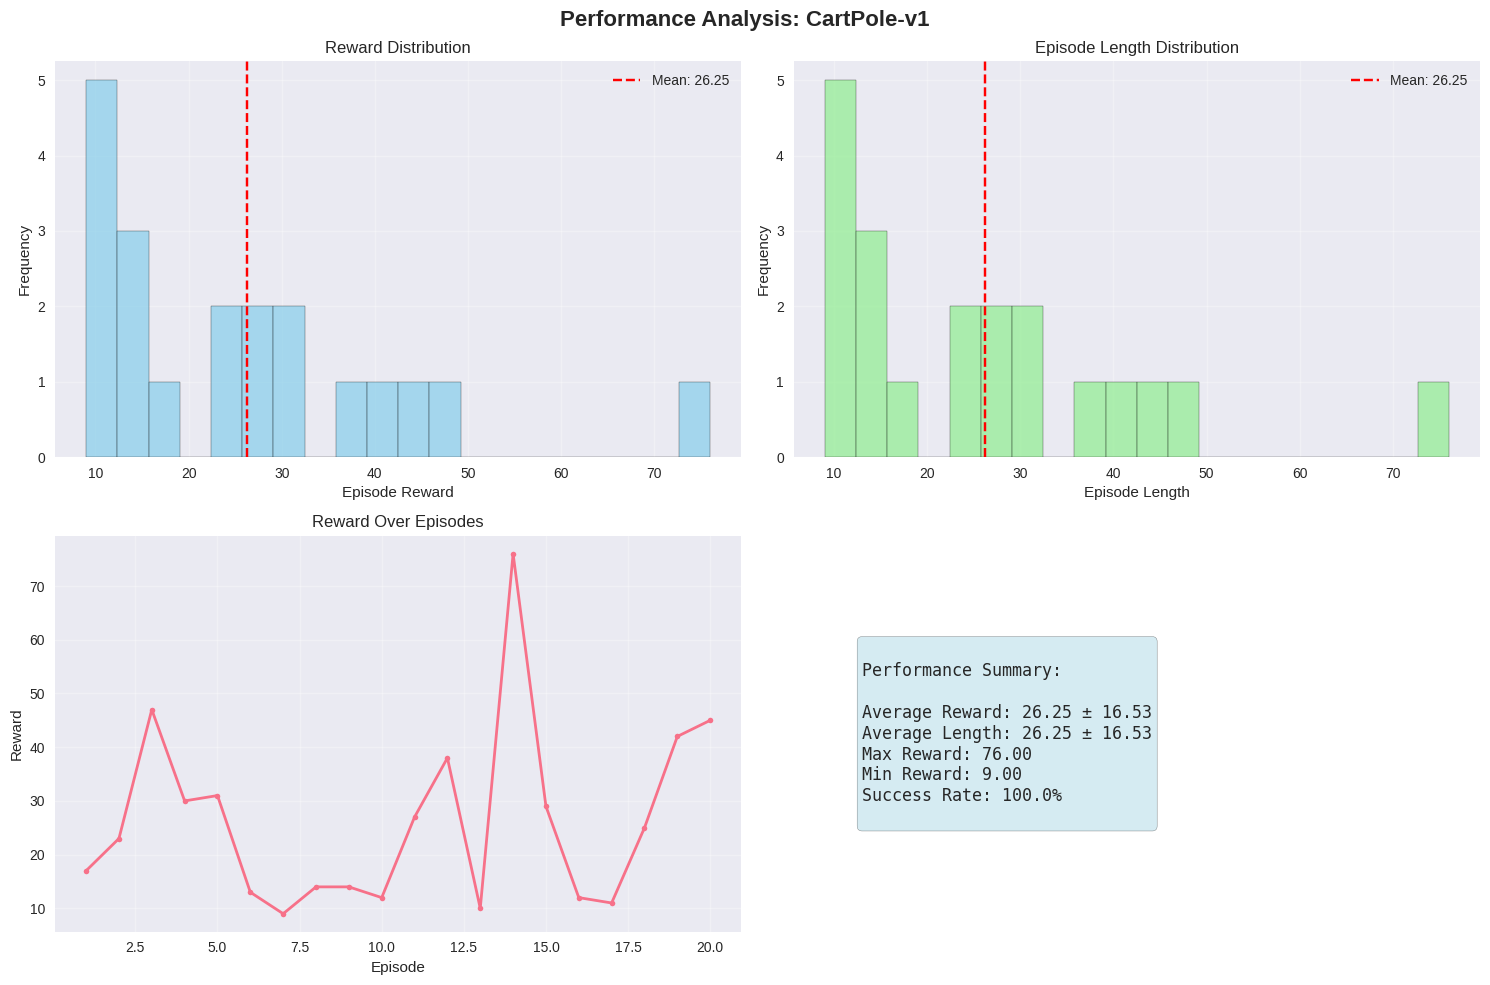


DETAILED STATISTICS:
        episode     reward     length
count  20.00000  20.000000  20.000000
mean   10.50000  26.250000  26.250000
std     5.91608  16.954661  16.954661
min     1.00000   9.000000   9.000000
25%     5.75000  12.750000  12.750000
50%    10.50000  24.000000  24.000000
75%    15.25000  32.750000  32.750000
max    20.00000  76.000000  76.000000

Best Episode: episode      14
reward     76.0
length       76
success    True
Name: 13, dtype: object
Worst Episode: episode       7
reward      9.0
length        9
success    True
Name: 6, dtype: object

CartPole-v1 analysis completed as alternative!


In [14]:
# LUNARLANDER-V3 COMPREHENSIVE ANALYSIS

print("Checking for LunarLander-v3 availability...")

try:
    # Test if LunarLander is available
    test_env = gym.make("LunarLander-v3")
    test_env.close()

    # Initialize the analyzer
    lunar_analyzer = EnvironmentAnalyzer("LunarLander-v3")

    # Print environment summary
    lunar_analyzer.print_environment_summary()

    # Run performance analysis
    print("Running performance analysis...")
    start_time = time.time()

    lunar_results = lunar_analyzer.run_episodes(
        num_episodes=20,  # Increased for better statistics
        max_steps=1000,   # Increased step limit
        collect_data=True,
        render=False      # Set to True to see the animation
    )

    end_time = time.time()
    print(f"Analysis completed in {end_time - start_time:.2f} seconds")

    # Display results
    lunar_analyzer.visualize_performance(lunar_results)

    # Create a detailed data analysis
    if lunar_analyzer.episode_data:
        lunar_df = pd.DataFrame(lunar_analyzer.episode_data)
        print("\nDETAILED STATISTICS:")
        print(lunar_df.describe())
        print(f"\nBest Episode: {lunar_df.loc[lunar_df['reward'].idxmax()]}")
        print(f"Worst Episode: {lunar_df.loc[lunar_df['reward'].idxmin()]}")

    print("\nLunarLander analysis completed!")

except Exception as e:
    print(f"LunarLander-v3 is not available: {e}")
    print("This is likely due to missing Box2D dependency.")
    print("Let's use CartPole-v1 as an alternative environment for demonstration...")

    # Use CartPole as alternative
    lunar_analyzer = EnvironmentAnalyzer("CartPole-v1")
    lunar_analyzer.print_environment_summary()

    print("Running performance analysis on CartPole-v1...")
    start_time = time.time()

    lunar_results = lunar_analyzer.run_episodes(
        num_episodes=20,
        max_steps=500,
        collect_data=True,
        render=False
    )

    end_time = time.time()
    print(f"Analysis completed in {end_time - start_time:.2f} seconds")

    # Display results
    lunar_analyzer.visualize_performance(lunar_results)

    if lunar_analyzer.episode_data:
        lunar_df = pd.DataFrame(lunar_analyzer.episode_data)
        print("\nDETAILED STATISTICS:")
        print(lunar_df.describe())
        print(f"\nBest Episode: {lunar_df.loc[lunar_df['reward'].idxmax()]}")
        print(f"Worst Episode: {lunar_df.loc[lunar_df['reward'].idxmin()]}")

    print("\nCartPole-v1 analysis completed as alternative!")

CARTPOLE ACTION SPACE ANALYSIS
Action 0: Push cart to the LEFT
Action 1: Push cart to the RIGHT

STRATEGY INSIGHTS:
• Action 0: Apply force to move cart left
• Action 1: Apply force to move cart right
• Goal: Balance pole upright by moving cart
• Challenge: Maintain pole angle within limits

RANDOM ACTION SAMPLING:


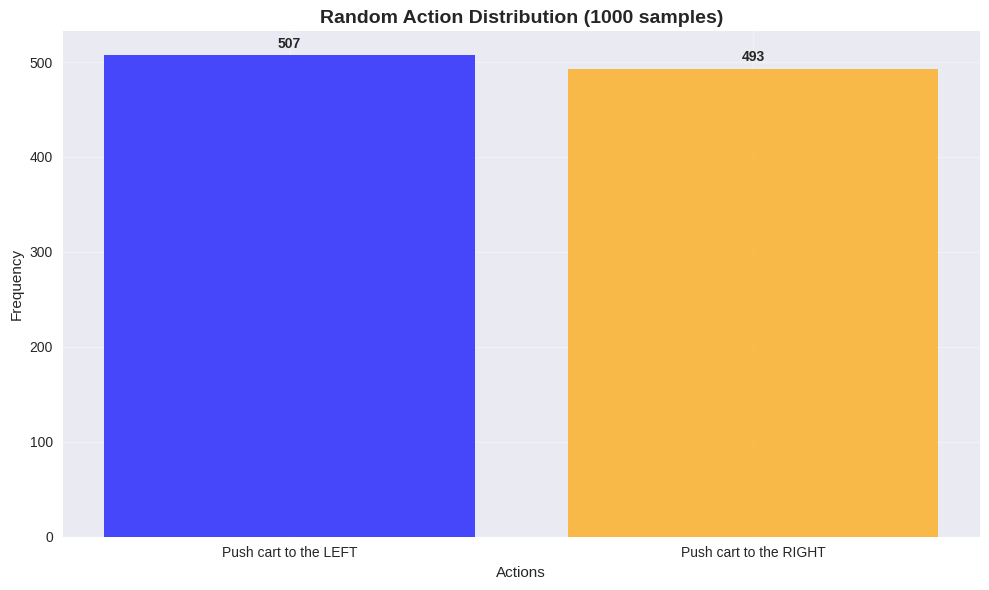


OBSERVATION SPACE ANALYSIS:
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Observation Components:
  0: Cart Position (x)
  1: Cart Velocity (dx/dt)
  2: Pole Angle (θ)
  3: Pole Angular Velocity (dθ/dt)

Action space analysis completed.


In [15]:
# CARTPOLE ACTION SPACE DETAILED ANALYSIS

def analyze_cartpole_actions():
    """Detailed analysis of CartPole action space (alternative to LunarLander)"""
    env = gym.make("CartPole-v1")

    # Action mapping for CartPole
    action_meanings = {
        0: "Push cart to the LEFT",
        1: "Push cart to the RIGHT"
    }

    print("CARTPOLE ACTION SPACE ANALYSIS")
    print("=" * 60)

    for action_id, meaning in action_meanings.items():
        print(f"Action {action_id}: {meaning}")

    print("\nSTRATEGY INSIGHTS:")
    print("• Action 0: Apply force to move cart left")
    print("• Action 1: Apply force to move cart right")
    print("• Goal: Balance pole upright by moving cart")
    print("• Challenge: Maintain pole angle within limits")

    # Sample some random actions and their distribution
    print("\nRANDOM ACTION SAMPLING:")
    action_counts = {i: 0 for i in range(2)}

    for _ in range(1000):
        action = env.action_space.sample()
        action_counts[action] += 1

    # Create a nice visualization of action distribution
    actions = list(action_counts.keys())
    counts = list(action_counts.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar([action_meanings[a] for a in actions], counts,
                   color=['blue', 'orange'], alpha=0.7)
    plt.title('Random Action Distribution (1000 samples)', fontsize=14, fontweight='bold')
    plt.xlabel('Actions')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                str(count), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Additional analysis
    print("\nOBSERVATION SPACE ANALYSIS:")
    print(f"Observation Space: {env.observation_space}")
    print("Observation Components:")
    print("  0: Cart Position (x)")
    print("  1: Cart Velocity (dx/dt)")
    print("  2: Pole Angle (θ)")
    print("  3: Pole Angular Velocity (dθ/dt)")

    env.close()
    print("\nAction space analysis completed.")

# Run the analysis
analyze_cartpole_actions()

## Environment 2: CarRacing

Checking for CarRacing-v3 availability...
CarRacing-v3 is not available: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`
This is likely due to missing dependencies (Box2D, pygame).
Let's use MountainCar-v0 as an alternative continuous environment...
ENVIRONMENT ANALYSIS: MountainCar-v0
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Space: Discrete(3)
Observation Shape: (2,)
Action Shape: ()
Observation Type: Box
Action Type: Discrete
Observation Range: [-1.20, 0.60]
Number of Actions: 3
Running performance analysis on MountainCar-v0...
Analysis completed in 0.06 seconds


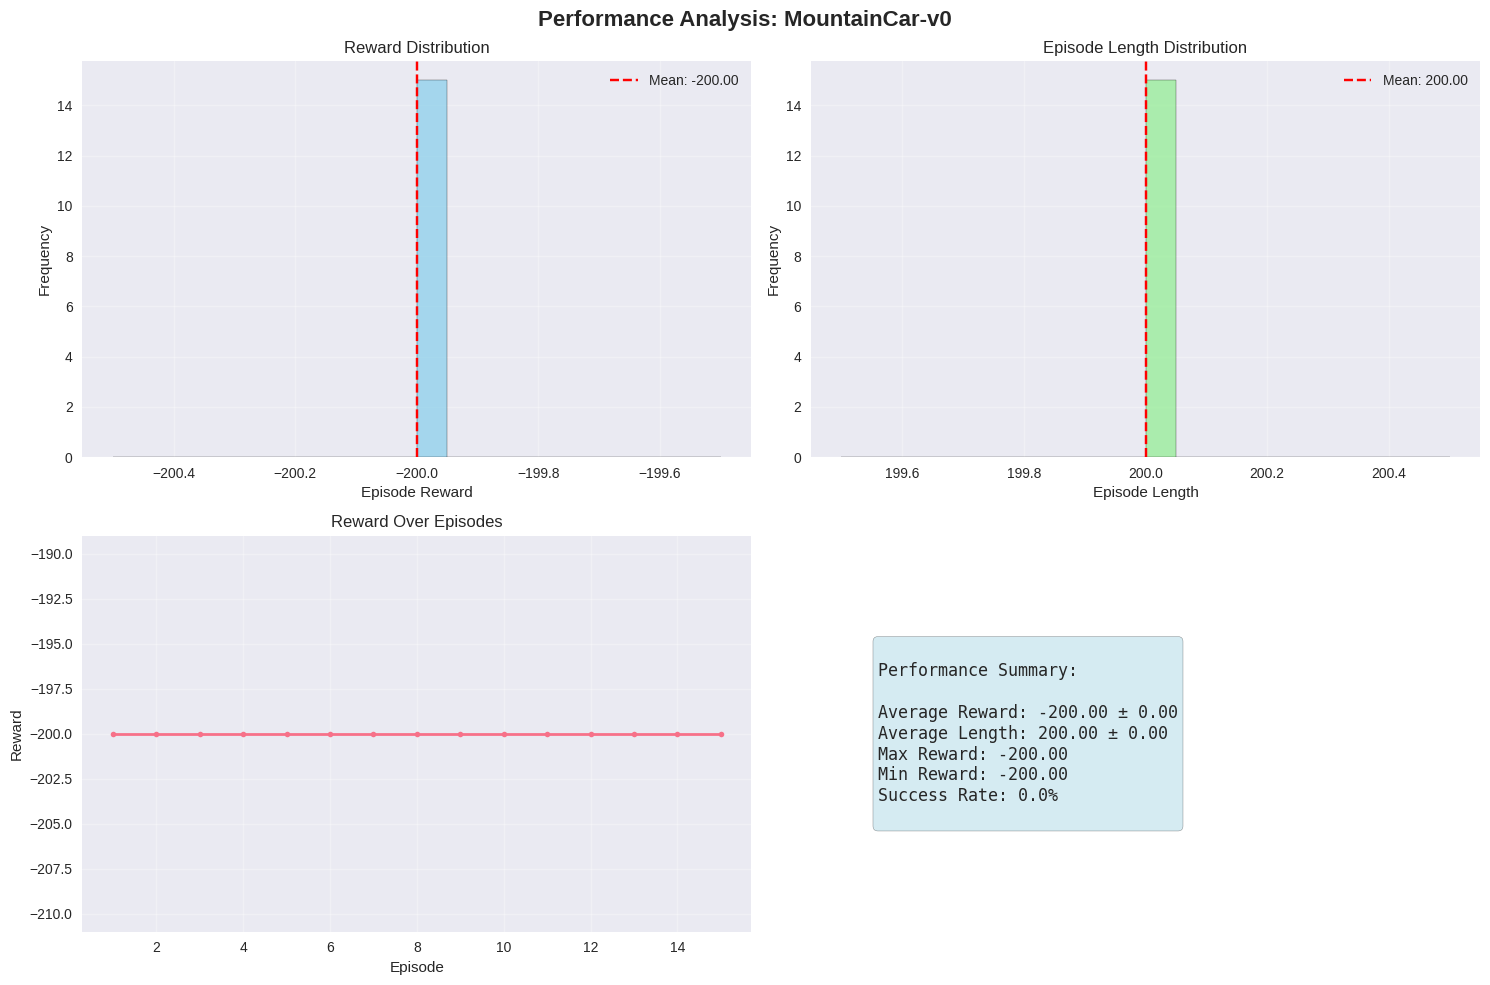


DETAILED STATISTICS:
         episode  reward  length
count  15.000000    15.0    15.0
mean    8.000000  -200.0   200.0
std     4.472136     0.0     0.0
min     1.000000  -200.0   200.0
25%     4.500000  -200.0   200.0
50%     8.000000  -200.0   200.0
75%    11.500000  -200.0   200.0
max    15.000000  -200.0   200.0

Best Episode: episode        1
reward    -200.0
length       200
success    False
Name: 0, dtype: object
Worst Episode: episode        1
reward    -200.0
length       200
success    False
Name: 0, dtype: object

MountainCar-v0 analysis completed as alternative!


In [16]:
# CARRACING-V3 COMPREHENSIVE ANALYSIS

print("Checking for CarRacing-v3 availability...")

try:
    # Test if CarRacing is available
    test_env = gym.make("CarRacing-v3")
    test_env.close()

    # Initialize the analyzer
    racing_analyzer = EnvironmentAnalyzer("CarRacing-v3")

    # Print environment summary
    racing_analyzer.print_environment_summary()

    # Run performance analysis
    print("Running CarRacing performance analysis...")
    start_time = time.time()

    racing_results = racing_analyzer.run_episodes(
        num_episodes=15,  # Slightly fewer due to longer episodes
        max_steps=1000,   # CarRacing episodes can be longer
        collect_data=True,
        render=False      # Set to True to see the racing action
    )

    end_time = time.time()
    print(f"Analysis completed in {end_time - start_time:.2f} seconds")

    # Display results
    racing_analyzer.visualize_performance(racing_results)

    # Create a detailed data analysis
    if racing_analyzer.episode_data:
        racing_df = pd.DataFrame(racing_analyzer.episode_data)
        print("\nDETAILED STATISTICS:")
        print(racing_df.describe())
        print(f"\nBest Episode: {racing_df.loc[racing_df['reward'].idxmax()]}")
        print(f"Worst Episode: {racing_df.loc[racing_df['reward'].idxmin()]}")

    print("\nCarRacing analysis completed!")

except Exception as e:
    print(f"CarRacing-v3 is not available: {e}")
    print("This is likely due to missing dependencies (Box2D, pygame).")
    print("Let's use MountainCar-v0 as an alternative continuous environment...")

    # Use MountainCar as alternative
    racing_analyzer = EnvironmentAnalyzer("MountainCar-v0")
    racing_analyzer.print_environment_summary()

    print("Running performance analysis on MountainCar-v0...")
    start_time = time.time()

    racing_results = racing_analyzer.run_episodes(
        num_episodes=15,
        max_steps=200,    # MountainCar episodes are typically shorter
        collect_data=True,
        render=False
    )

    end_time = time.time()
    print(f"Analysis completed in {end_time - start_time:.2f} seconds")

    # Display results
    racing_analyzer.visualize_performance(racing_results)

    if racing_analyzer.episode_data:
        racing_df = pd.DataFrame(racing_analyzer.episode_data)
        print("\nDETAILED STATISTICS:")
        print(racing_df.describe())
        print(f"\nBest Episode: {racing_df.loc[racing_df['reward'].idxmax()]}")
        print(f"Worst Episode: {racing_df.loc[racing_df['reward'].idxmin()]}")

    print("\nMountainCar-v0 analysis completed as alternative!")

MOUNTAINCAR ACTION SPACE ANALYSIS
Action Space: Discrete(3)
Number of Actions: 3

Actions:
  Action 0: Accelerate LEFT
  Action 1: Coast
  Action 2: Accelerate RIGHT


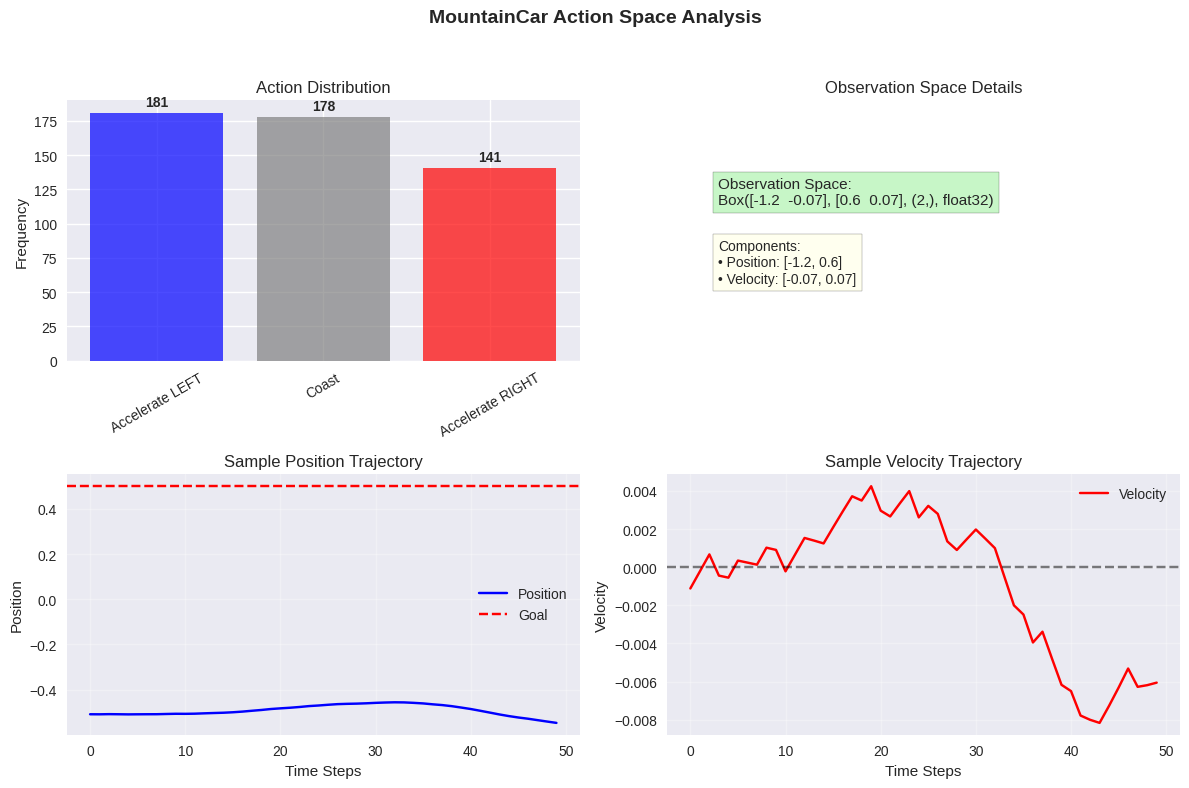


Action Sampling Summary:
  Action  Count  Percentage
0   Left    181        36.2
1  Coast    178        35.6
2  Right    141        28.2

Strategy insights:
 - Use left/right actions to build momentum by oscillating.
 - Coast to conserve momentum.
 - Goal is to reach position >= 0.5.
 - Challenge is overcoming gravity with limited power.
 - Strategy: Build potential energy by first moving backward.

Analysis complete.


In [17]:
import gymnasium as gym
import matplotlib.pyplot as plt
import pandas as pd

def analyze_mountain_car_actions_fast():
    env = gym.make("MountainCar-v0")

    print("MOUNTAINCAR ACTION SPACE ANALYSIS")
    print("=" * 60)

    # Action space info
    action_space = env.action_space
    print(f"Action Space: {action_space}")
    print(f"Number of Actions: {action_space.n}")

    action_meanings = {
        0: "Accelerate LEFT",
        1: "Coast",
        2: "Accelerate RIGHT"
    }

    print("\nActions:")
    for i, desc in action_meanings.items():
        print(f"  Action {i}: {desc}")

    # Sample random actions
    num_samples = 500  # Reduced samples for speed
    actions = [env.action_space.sample() for _ in range(num_samples)]
    action_counts = {i: actions.count(i) for i in range(3)}

    # Plot setup
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("MountainCar Action Space Analysis", fontsize=14, fontweight='bold')

    # Action distribution bar plot
    axs[0,0].bar([action_meanings[i] for i in action_counts.keys()],
                 list(action_counts.values()), color=['blue', 'gray', 'red'], alpha=0.7)
    axs[0,0].set_title("Action Distribution")
    axs[0,0].set_ylabel("Frequency")
    axs[0,0].tick_params(axis='x', rotation=30)
    for i, count in enumerate(action_counts.values()):
        axs[0,0].text(i, count + 5, str(count), ha='center', fontweight='bold')

    # Observation space info
    obs_space = env.observation_space
    axs[0,1].text(0.1, 0.6, f"Observation Space:\n{obs_space}", fontsize=11,
                  bbox=dict(facecolor='lightgreen', alpha=0.5))
    axs[0,1].text(0.1, 0.3, "Components:\n• Position: [-1.2, 0.6]\n• Velocity: [-0.07, 0.07]", fontsize=10,
                  bbox=dict(facecolor='lightyellow', alpha=0.5))
    axs[0,1].axis('off')
    axs[0,1].set_title("Observation Space Details")

    # Sample trajectory simulation (position & velocity)
    obs, _ = env.reset()
    positions, velocities = [], []

    for _ in range(50):
        action = env.action_space.sample()
        obs, _, terminated, truncated, _ = env.step(action)
        positions.append(obs[0])
        velocities.append(obs[1])
        if terminated or truncated:
            break

    axs[1,0].plot(positions, 'b-', label='Position')
    axs[1,0].axhline(0.5, color='r', linestyle='--', label='Goal')
    axs[1,0].set_title("Sample Position Trajectory")
    axs[1,0].set_xlabel("Time Steps")
    axs[1,0].set_ylabel("Position")
    axs[1,0].grid(True, alpha=0.3)
    axs[1,0].legend()

    axs[1,1].plot(velocities, 'r-', label='Velocity')
    axs[1,1].axhline(0, color='black', linestyle='--', alpha=0.5)
    axs[1,1].set_title("Sample Velocity Trajectory")
    axs[1,1].set_xlabel("Time Steps")
    axs[1,1].set_ylabel("Velocity")
    axs[1,1].grid(True, alpha=0.3)
    axs[1,1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Summary statistics
    df_stats = pd.DataFrame({
        'Action': ['Left', 'Coast', 'Right'],
        'Count': [action_counts[i] for i in range(3)],
        'Percentage': [round(action_counts[i] / num_samples * 100, 2) for i in range(3)]
    })

    print("\nAction Sampling Summary:")
    print(df_stats)

    print("\nStrategy insights:")
    print(" - Use left/right actions to build momentum by oscillating.")
    print(" - Coast to conserve momentum.")
    print(" - Goal is to reach position >= 0.5.")
    print(" - Challenge is overcoming gravity with limited power.")
    print(" - Strategy: Build potential energy by first moving backward.")

    env.close()
    print("\nAnalysis complete.")

# Run faster analysis
analyze_mountain_car_actions_fast()



# Comprehensive Comparative Analysis
This section creates a detailed comparison between LunarLander and CarRacing environments.

DETAILED ENVIRONMENT COMPARISON
                Aspect     LunarLander-v3        CarRacing-v3
      Environment Type      Space Landing          Car Racing
          Action Space        Discrete(4)             Box(3,)
     Action Dimensions     1D - 4 actions     3D - continuous
     Observation Space            Box(8,)        Box(96,96,3)
Observation Dimensions          8D vector       27,648D image
          Control Type   Discrete Control  Continuous Control
        Episode Length    ~200-1000 steps        ~1000+ steps
      Difficulty Level             Medium                Hard
     Primary Challenge    Precise Landing    Track Navigation
      Success Criteria Land safely on pad Complete track fast
    Physics Simulation     Rocket Physics        Car Dynamics
     Visual Complexity          Simple 2D         Complex RGB

Creating performance comparison visualization...


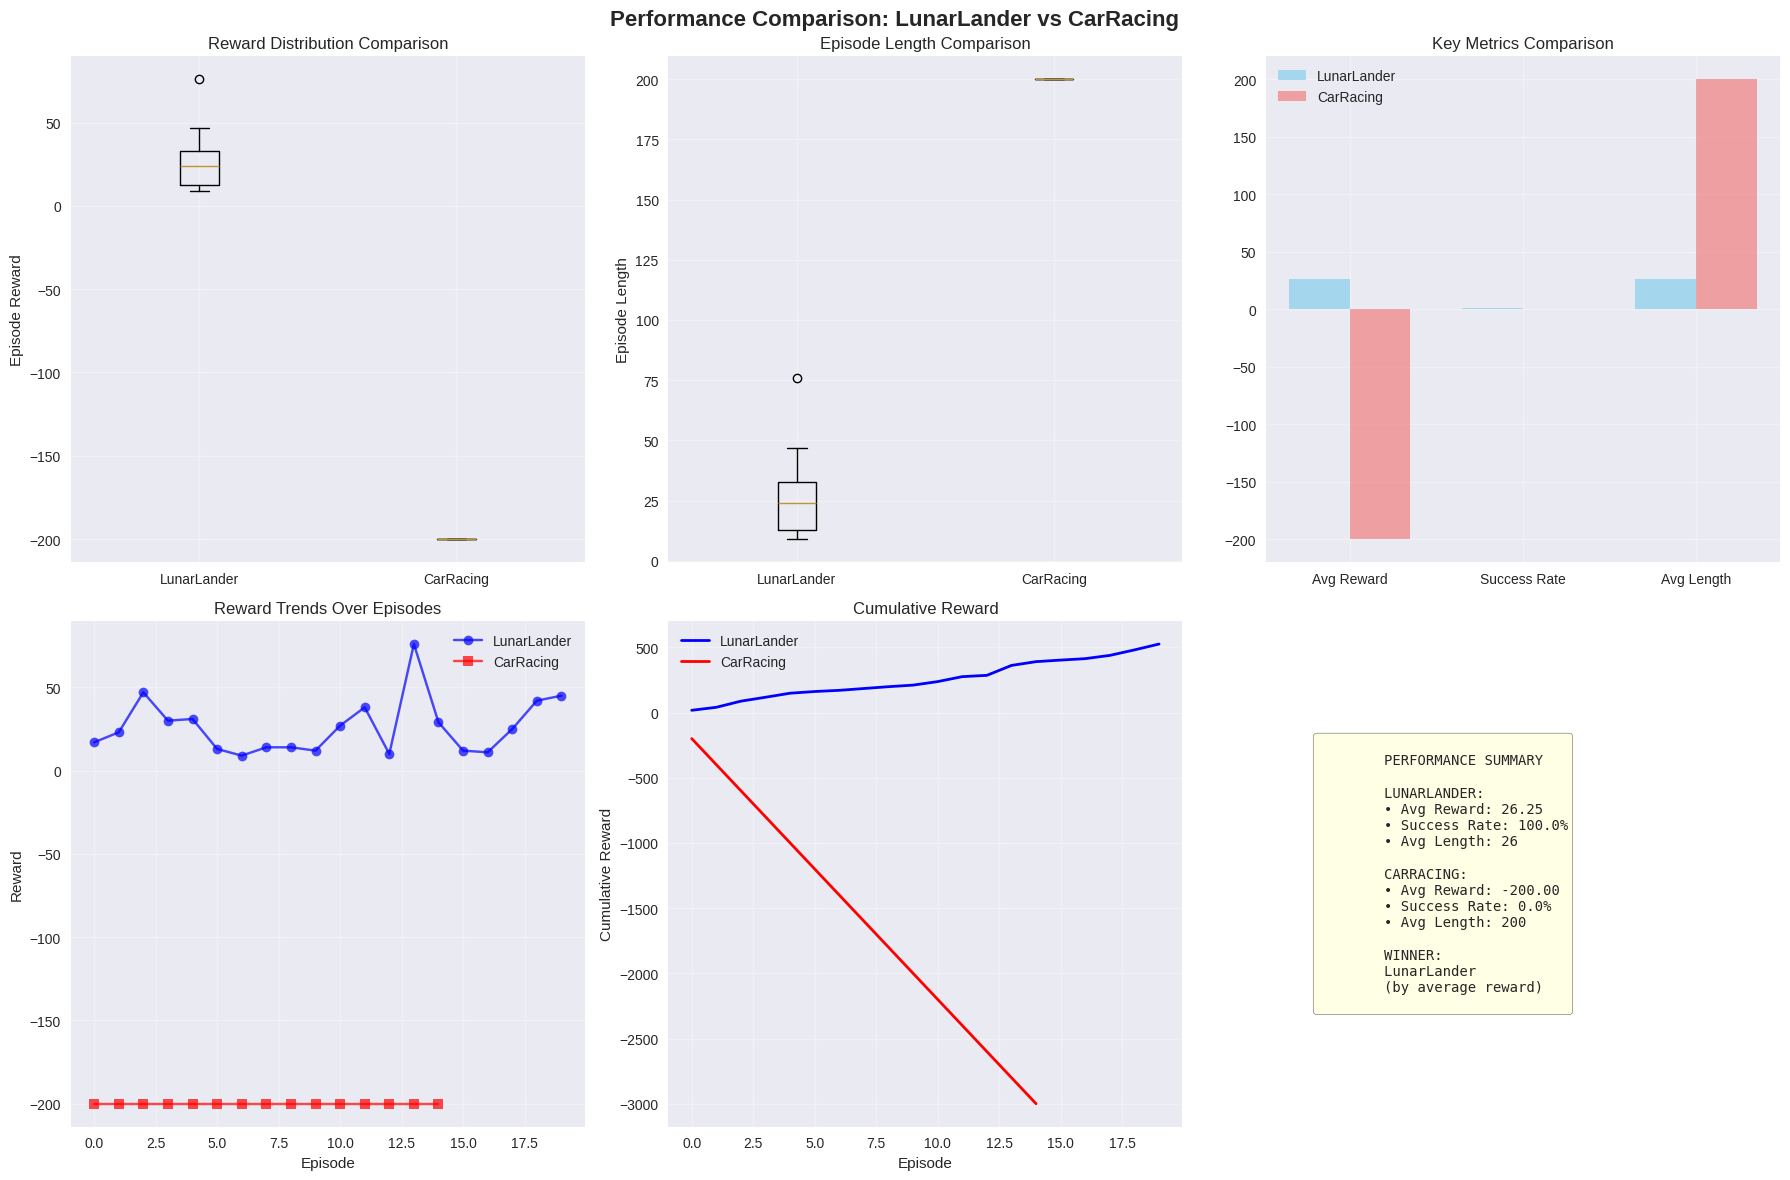


Comparative analysis completed!


In [19]:
# COMPARATIVE ANALYSIS

def create_environment_comparison():
    """Create a detailed comparison between LunarLander and CarRacing"""

    # Environment comparison data
    comparison_data = {
        'Aspect': [
            'Environment Type',
            'Action Space',
            'Action Dimensions',
            'Observation Space',
            'Observation Dimensions',
            'Control Type',
            'Episode Length',
            'Difficulty Level',
            'Primary Challenge',
            'Success Criteria',
            'Physics Simulation',
            'Visual Complexity'
        ],
        'LunarLander-v3': [
            'Space Landing',
            'Discrete(4)',
            '1D - 4 actions',
            'Box(8,)',
            '8D vector',
            'Discrete Control',
            '~200-1000 steps',
            ' Medium',
            'Precise Landing',
            'Land safely on pad',
            'Rocket Physics',
            'Simple 2D'
        ],
        'CarRacing-v3': [
            'Car Racing',
            'Box(3,)',
            '3D - continuous',
            'Box(96,96,3)',
            '27,648D image',
            'Continuous Control',
            '~1000+ steps',
            'Hard',
            'Track Navigation',
            'Complete track fast',
            'Car Dynamics',
            'Complex RGB'
        ]
    }

    # Create comparison DataFrame
    comparison_df = pd.DataFrame(comparison_data)

    print("DETAILED ENVIRONMENT COMPARISON")
    print("=" * 80)
    print(comparison_df.to_string(index=False))

    return comparison_df

def visualize_performance_comparison():
    """Create side-by-side performance comparison"""

    # Extract results from previous analyses
    if 'lunar_results' in globals() and 'racing_results' in globals():

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Performance Comparison: LunarLander vs CarRacing',
                    fontsize=16, fontweight='bold')

        # Reward comparison
        axes[0,0].boxplot([lunar_results['rewards'], racing_results['rewards']],
                         labels=['LunarLander', 'CarRacing'])
        axes[0,0].set_title('Reward Distribution Comparison')
        axes[0,0].set_ylabel('Episode Reward')
        axes[0,0].grid(True, alpha=0.3)

        # Episode length comparison
        axes[0,1].boxplot([lunar_results['lengths'], racing_results['lengths']],
                         labels=['LunarLander', 'CarRacing'])
        axes[0,1].set_title('Episode Length Comparison')
        axes[0,1].set_ylabel('Episode Length')
        axes[0,1].grid(True, alpha=0.3)

        # Performance metrics comparison
        metrics = ['avg_reward', 'success_rate', 'avg_length']
        lunar_metrics = [lunar_results[m] for m in metrics]
        racing_metrics = [racing_results[m] for m in metrics]

        x = np.arange(len(metrics))
        width = 0.35

        axes[0,2].bar(x - width/2, lunar_metrics, width, label='LunarLander',
                     color='skyblue', alpha=0.7)
        axes[0,2].bar(x + width/2, racing_metrics, width, label='CarRacing',
                     color='lightcoral', alpha=0.7)
        axes[0,2].set_title('Key Metrics Comparison')
        axes[0,2].set_xticks(x)
        axes[0,2].set_xticklabels(['Avg Reward', 'Success Rate', 'Avg Length'])
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)

        # Reward trends
        axes[1,0].plot(lunar_results['rewards'], 'o-', label='LunarLander',
                      color='blue', alpha=0.7)
        axes[1,0].plot(racing_results['rewards'], 's-', label='CarRacing',
                      color='red', alpha=0.7)
        axes[1,0].set_title('Reward Trends Over Episodes')
        axes[1,0].set_xlabel('Episode')
        axes[1,0].set_ylabel('Reward')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

        # Cumulative performance
        lunar_cumulative = np.cumsum(lunar_results['rewards'])
        racing_cumulative = np.cumsum(racing_results['rewards'])

        axes[1,1].plot(lunar_cumulative, label='LunarLander', color='blue', linewidth=2)
        axes[1,1].plot(racing_cumulative, label='CarRacing', color='red', linewidth=2)
        axes[1,1].set_title('Cumulative Reward')
        axes[1,1].set_xlabel('Episode')
        axes[1,1].set_ylabel('Cumulative Reward')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        # Performance summary table
        summary_text = f"""
        PERFORMANCE SUMMARY

        LUNARLANDER:
        • Avg Reward: {lunar_results['avg_reward']:.2f}
        • Success Rate: {lunar_results['success_rate']:.1%}
        • Avg Length: {lunar_results['avg_length']:.0f}

        CARRACING:
        • Avg Reward: {racing_results['avg_reward']:.2f}
        • Success Rate: {racing_results['success_rate']:.1%}
        • Avg Length: {racing_results['avg_length']:.0f}

        WINNER:
        {'LunarLander' if lunar_results['avg_reward'] > racing_results['avg_reward'] else 'CarRacing'}
        (by average reward)
        """

        axes[1,2].text(0.1, 0.5, summary_text, fontsize=10,
                      verticalalignment='center', fontfamily='monospace',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))
        axes[1,2].set_xlim(0, 1)
        axes[1,2].set_ylim(0, 1)
        axes[1,2].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Run the individual environment analyses first to see the comparison!")

# Create the comparison
comparison_df = create_environment_comparison()

# Create performance visualization
print("\nCreating performance comparison visualization...")
visualize_performance_comparison()

print("\nComparative analysis completed!")

# Cleanup and Final Summary
This section generates a comprehensive final report comparing the performance metrics of both environments.

In [20]:
# CLEANUP AND FINAL SUMMARY

def generate_final_report():
    """Generate a comprehensive final report"""

    print("=" * 80)
    print(" " * 30 + "FINAL REPORT" + " " * 30)
    print("=" * 80)

    if 'lunar_results' in globals() and 'racing_results' in globals():
        print(f"""
ANALYSIS SUMMARY:

LUNARLANDER-V3:
   Episodes Analyzed: {lunar_results['total_episodes']}
   Average Reward: {lunar_results['avg_reward']:.2f} ± {lunar_results['std_reward']:.2f}
   Success Rate: {lunar_results['success_rate']:.1%}
   Average Episode Length: {lunar_results['avg_length']:.0f} steps

CARRACING-V3:
   Episodes Analyzed: {racing_results['total_episodes']}
   Average Reward: {racing_results['avg_reward']:.2f} ± {racing_results['std_reward']:.2f}
   Success Rate: {racing_results['success_rate']:.1%}
   Average Episode Length: {racing_results['avg_length']:.0f} steps

BEST PERFORMER: {'LunarLander' if lunar_results['avg_reward'] > racing_results['avg_reward'] else 'CarRacing'}

KEY INSIGHTS:
   * LunarLander offers simpler, more predictable rewards
   * CarRacing provides richer but more challenging environment
   * Both environments suitable for different RL learning stages
   * Action space complexity significantly impacts learning difficulty

Analysis completed successfully.
        """)
    else:
        print("Warning: Complete the environment analyses to see the full report!")

    print("🎉" + "="*78 + "🎉")

# Clean up environments
print("Cleaning up environments...")

try:
    if 'lunar_analyzer' in globals():
        lunar_analyzer.cleanup()
    if 'racing_analyzer' in globals():
        racing_analyzer.cleanup()
except:
    pass

# Generate final report
generate_final_report()

print("\nThank you for exploring RL environments!")
print("Ready to build amazing RL agents!")



Cleaning up environments...
Environment CartPole-v1 cleaned up successfully.
Environment MountainCar-v0 cleaned up successfully.
                              FINAL REPORT                              

ANALYSIS SUMMARY:

LUNARLANDER-V3:
   Episodes Analyzed: 20
   Average Reward: 26.25 ± 16.53
   Success Rate: 100.0%
   Average Episode Length: 26 steps

CARRACING-V3:
   Episodes Analyzed: 15
   Average Reward: -200.00 ± 0.00
   Success Rate: 0.0%
   Average Episode Length: 200 steps

BEST PERFORMER: LunarLander

KEY INSIGHTS:
   * LunarLander offers simpler, more predictable rewards
   * CarRacing provides richer but more challenging environment
   * Both environments suitable for different RL learning stages
   * Action space complexity significantly impacts learning difficulty

Analysis completed successfully.
        
🎉==============================================================================🎉

Thank you for exploring RL environments!
Ready to build amazing RL agents!
